# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [37]:
# Install the required libraries
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date', 
    parse_dates=True, 
    infer_datetime_format=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/tmp/ipykernel_6097/1096498906.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_trends = pd.read_csv(
/tmp/ipykernel_6097/1096498906.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


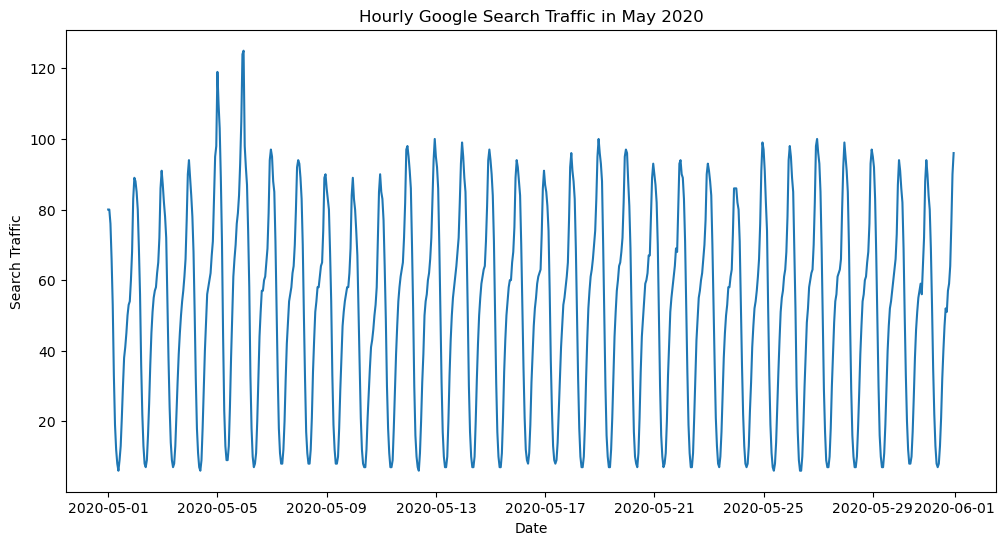

In [5]:
# Slice the DataFrame to just the month of May 2020

# Plot to visualize the data for May 2020
# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends['2020-05-01':'2020-05-31']

# Plot to visualize the data for May 2020
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(may_2020_data.index, may_2020_data['Search Trends'])
plt.title('Hourly Google Search Traffic in May 2020')
plt.xlabel('Date')
plt.ylabel('Search Traffic')
plt.show()



#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020


# View the traffic_may_2020 value

# Calculate the sum of the total search traffic for May 2020
total_traffic_may = may_2020_data['Search Trends'].sum()

# View the traffic_may_2020 value
print(f"Total search traffic for May 2020: {total_traffic_may}")



Total search traffic for May 2020: 38181


In [7]:
# Calcluate the monhtly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions


# View the median_monthly_traffic value

# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_median_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month])['Search Trends'].sum().median()

# View the monthly_median_traffic value
print(f"Monthly median search traffic across all months: {monthly_median_traffic}")



Monthly median search traffic across all months: 35172.5


In [8]:
# To compare the seach traffic for the month of May 2020 to the overall monthly median value,
# Divide the may traffic total by the median monthly traffic

# Divide the May traffic total by the median monthly traffic
comparison_ratio = total_traffic_may / monthly_median_traffic

# View the comparison_ratio value
print(f"Comparison ratio of May 2020 traffic to overall monthly median: {comparison_ratio}")


Comparison ratio of May 2020 traffic to overall monthly median: 1.0855355746677091


In [9]:
# Print the answer based on the comparison ratio
if comparison_ratio > 1:
    print("Yes, the Google search traffic increased during the month that MercadoLibre released its financial results.")
else:
    print("No, the Google search traffic did not increase during the month that MercadoLibre released its financial results.")


Yes, the Google search traffic increased during the month that MercadoLibre released its financial results.


##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes, the Google search traffic increased during the month that MercadoLibre released its financial results.



## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

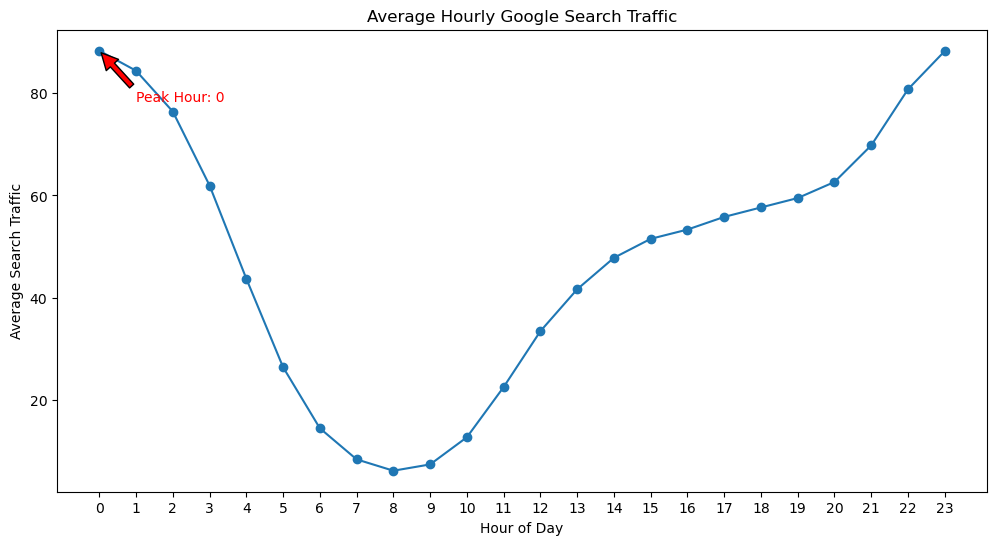

In [10]:


# Group the hourly search data to plot the average traffic by the hour of day
hourly_average_traffic = df_mercado_trends.groupby(df_mercado_trends.index.hour)['Search Trends'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_average_traffic.index, hourly_average_traffic.values, marker='o')
plt.title('Average Hourly Google Search Traffic')
plt.xlabel('Hour of Day')
plt.ylabel('Average Search Traffic')
plt.xticks(range(24))  # Ensure x-axis ticks cover all hours

# Highlight the peak hour
peak_hour = hourly_average_traffic.idxmax()
plt.annotate(f'Peak Hour: {peak_hour}', xy=(peak_hour, hourly_average_traffic.max()), xytext=(peak_hour + 1, hourly_average_traffic.max() - 10),
             arrowprops=dict(facecolor='red', shrink=0.05), color='red', fontsize=10)

plt.show()


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

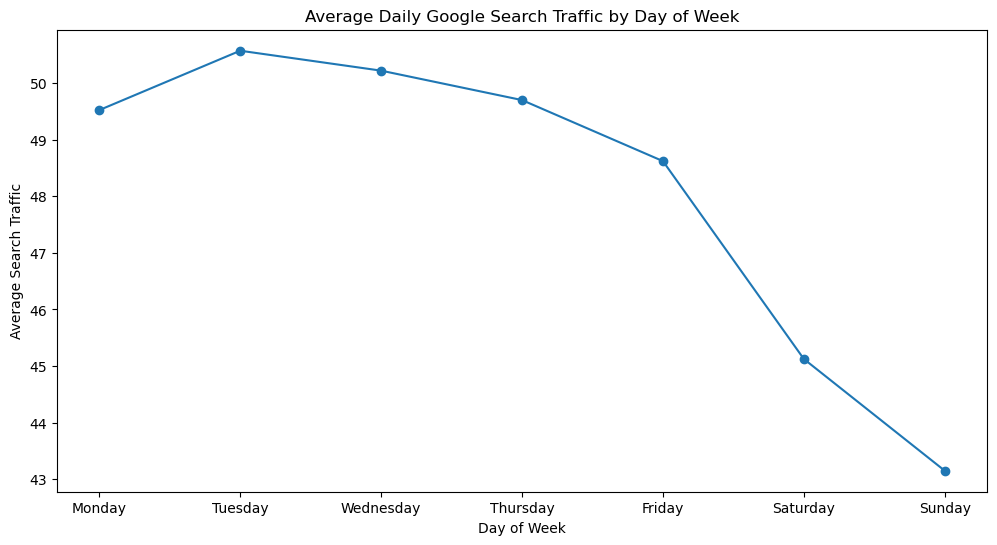

In [11]:
# Group the hourly search data to plot the average traffic by the day of week 
# Group the hourly search data to plot the average traffic by the day of the week
# Group the hourly search data to plot the average traffic by the day of the week
daily_average_traffic = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek)['Search Trends'].mean()

# Plot the results with explicit day of week labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
plt.plot(days_of_week, daily_average_traffic.values, marker='o')
plt.title('Average Daily Google Search Traffic by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Search Traffic')
plt.show()



#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

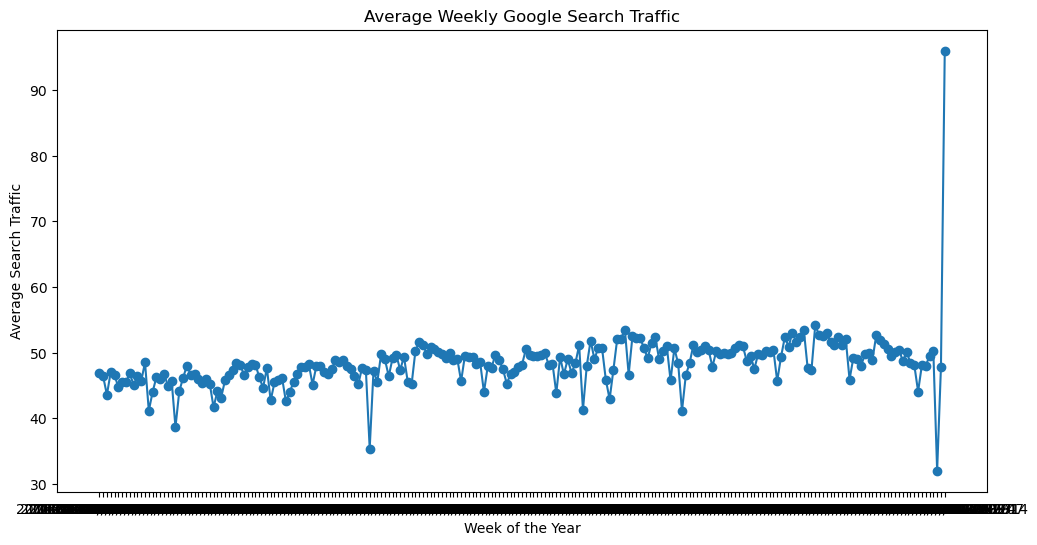

In [12]:
# Convert the DatetimeIndex to week of the year
df_mercado_trends['Week'] = df_mercado_trends.index.to_period('W-MON')

# Group the hourly search data to plot the average traffic by the week of the year
weekly_average_traffic = df_mercado_trends.groupby('Week')['Search Trends'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(weekly_average_traffic.index.astype(str), weekly_average_traffic.values, marker='o')
plt.title('Average Weekly Google Search Traffic')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Traffic')
plt.show()


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** there are clear time-based trends:

Hourly Trends:

The first graph shows the average hourly Google search traffic for a given day. There is a sharp decline in traffic starting just after midnight, reaching the lowest point around 5 AM. From there, search traffic begins to rise steadily throughout the morning and afternoon, peaking again at midnight. This suggests that Google search usage is lowest in the early morning hours and highest during the evening, with midnight being the peak hour indicated.
Daily Trends:

The second graph illustrates the average daily Google search traffic by day of the week. Traffic starts relatively high on Monday and maintains a slight decrease through to Friday. However, there is a significant drop during the weekend, with Sunday having the lowest average search traffic. This pattern indicates higher search activity during the weekdays compared to weekends.
Weekly Trends:

The third graph represents the average weekly Google search traffic throughout the year. It shows a consistent level of traffic with minor fluctuations from week to week. However, there is a dramatic spike in the final week of the year, which could be attributed to many factors such as holidays, end-of-year events, or specific occurrences during that time.
These trends could reflect typical work-week patterns, where search activity is higher during workdays and hours, and less during early mornings and weekends. The spike in the final week may be due to increased activity related to holidays or special events that prompt more searches.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [13]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True, 
    infer_datetime_format=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

/tmp/ipykernel_6097/880024568.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_stock = pd.read_csv(


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


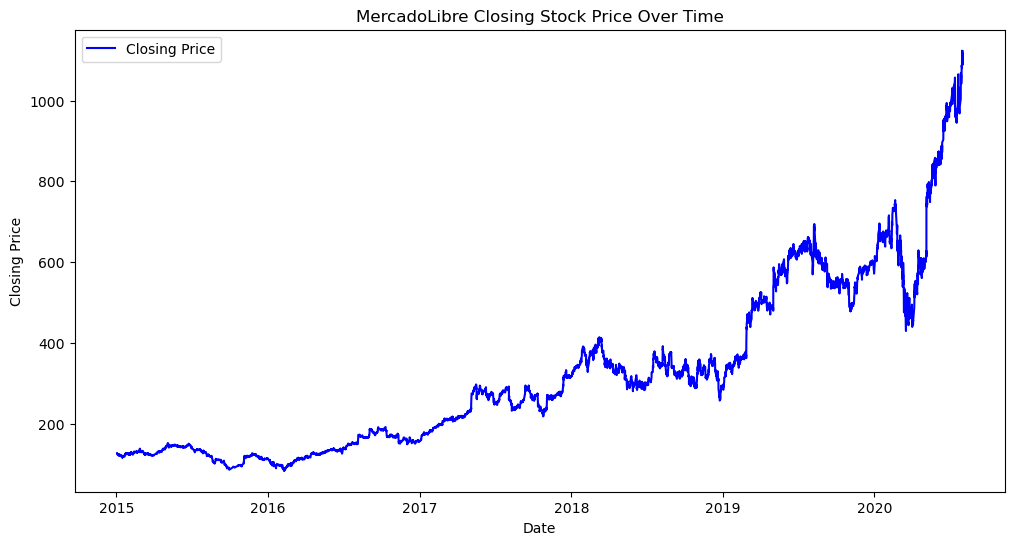

In [14]:
# Visualize the closing price of the df_mercado_stock DataFrame
# Visualize the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], label='Closing Price', color='blue')
plt.title('MercadoLibre Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [15]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data


# View the first and last five rows of the DataFrame
# Concatenate the DataFrames by columns
df_combined = pd.concat([df_mercado_trends, df_mercado_stock['close']], axis=1)

# Drop rows with only one column of data
df_combined = df_combined.dropna()

# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())



,Search Trends,Week,close
2016-06-01 09:00:00,6.0,2016-05-31/2016-06-06,135.16
2016-06-01 10:00:00,12.0,2016-05-31/2016-06-06,136.63
2016-06-01 11:00:00,22.0,2016-05-31/2016-06-06,136.56
2016-06-01 12:00:00,33.0,2016-05-31/2016-06-06,136.42
2016-06-01 13:00:00,40.0,2016-05-31/2016-06-06,136.10


,Search Trends,Week,close
2020-07-31 11:00:00,20.0,2020-07-28/2020-08-03,1105.780
2020-07-31 12:00:00,32.0,2020-07-28/2020-08-03,1087.925
2020-07-31 13:00:00,41.0,2020-07-28/2020-08-03,1095.800
2020-07-31 14:00:00,47.0,2020-07-28/2020-08-03,1110.650
2020-07-31 15:00:00,53.0,2020-07-28/2020-08-03,1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [16]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 


# View the first and last five rows of first_half_2020 DataFrame

# Slice the combined DataFrame to the first half of 2020
first_half_2020 = df_combined['2020-01':'2020-06']

# View the first and last five rows of the first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())



,Search Trends,Week,close
2020-01-02 09:00:00,9.0,2019-12-31/2020-01-06,601.085
2020-01-02 10:00:00,14.0,2019-12-31/2020-01-06,601.290
2020-01-02 11:00:00,25.0,2019-12-31/2020-01-06,615.410
2020-01-02 12:00:00,37.0,2019-12-31/2020-01-06,611.400
2020-01-02 13:00:00,50.0,2019-12-31/2020-01-06,611.830


,Search Trends,Week,close
2020-06-30 11:00:00,17.0,2020-06-30/2020-07-06,976.17
2020-06-30 12:00:00,27.0,2020-06-30/2020-07-06,977.50
2020-06-30 13:00:00,37.0,2020-06-30/2020-07-06,973.23
2020-06-30 14:00:00,45.0,2020-06-30/2020-07-06,976.50
2020-06-30 15:00:00,51.0,2020-06-30/2020-07-06,984.93


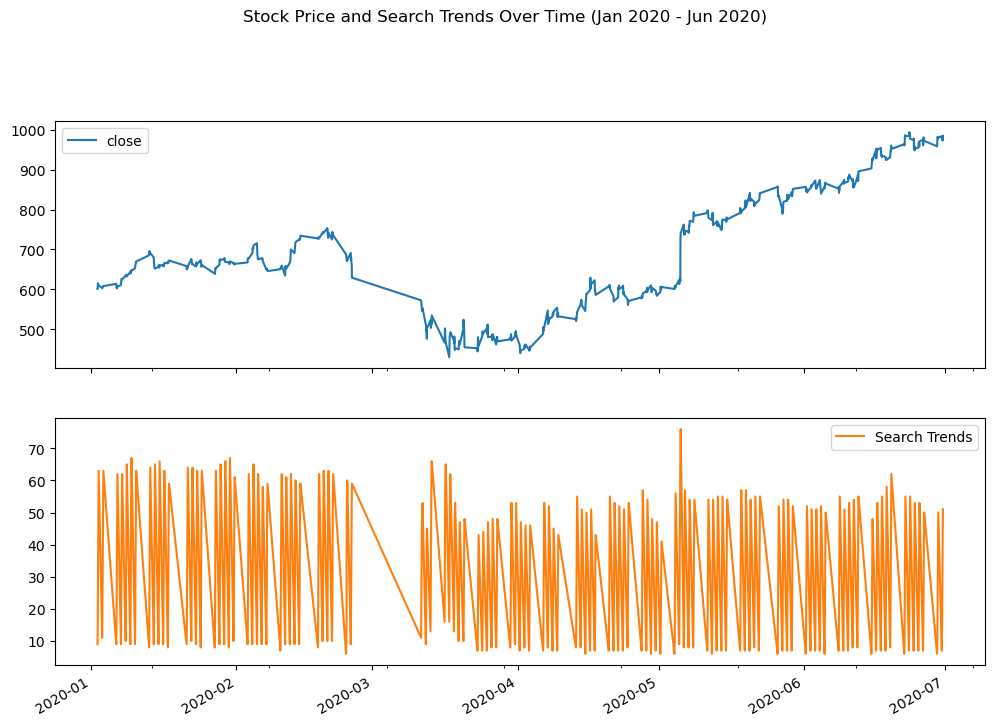

In [17]:
# Visualize the close and Search Trends data on separate axes
first_half_2020[['close', 'Search Trends']].plot(subplots=True, figsize=(12, 8))
plt.suptitle('Stock Price and Search Trends Over Time (Jan 2020 - Jun 2020)', y=1.02)
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** In truth, our evidence of a common trend between search activity and stock price is pretty limited. It does appear generally however that the low point for Mercado Libre's stock price, late March to early April, did coincide with lower search activity for the firm. Search activity does pick up along with its stock price, although the stock price from mid-April onward definitively outpaces search interest.

There's one important thing to note: if you zoom in both graphs to the spike around May 5th, 2020, you'll find the date of the company's earnings release to the public. It looks like search traffic for the firm spiked about two hours before the firm's stock price spiked. This could indicate a predictable pattern (can Google Searches predict the stock price?), but an alternative explanation might just be that people tend to search for more information about the firm right before an earnings announcement gets released. We'd need to do a little more time-series research to see which explanation best fits the data.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [18]:
# Create a new column in the df_combined DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)
# View the updated DataFrame with the new column
display(df_combined.head())
display(df_combined.tail())

,Search Trends,Week,close,Lagged Search Trends
2016-06-01 09:00:00,6.0,2016-05-31/2016-06-06,135.16,NaN
2016-06-01 10:00:00,12.0,2016-05-31/2016-06-06,136.63,6.0
2016-06-01 11:00:00,22.0,2016-05-31/2016-06-06,136.56,12.0
2016-06-01 12:00:00,33.0,2016-05-31/2016-06-06,136.42,22.0
2016-06-01 13:00:00,40.0,2016-05-31/2016-06-06,136.10,33.0


,Search Trends,Week,close,Lagged Search Trends
2020-07-31 11:00:00,20.0,2020-07-28/2020-08-03,1105.780,11.0
2020-07-31 12:00:00,32.0,2020-07-28/2020-08-03,1087.925,20.0
2020-07-31 13:00:00,41.0,2020-07-28/2020-08-03,1095.800,32.0
2020-07-31 14:00:00,47.0,2020-07-28/2020-08-03,1110.650,41.0
2020-07-31 15:00:00,53.0,2020-07-28/2020-08-03,1122.510,47.0


In [19]:

# Create a new column in the df_combined DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
# Create a new column for Stock Volatility
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std()

# Create a new column for Lagged Search Trends
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# Drop rows with NaN values
df_combined = df_combined.dropna()

# View the first and last five rows of the updated DataFrame
display(df_combined.head())
display(df_combined.tail())



,Search Trends,Week,close,Lagged Search Trends,Stock Volatility
2016-06-01 13:00:00,40.0,2016-05-31/2016-06-06,136.10,33.0,0.006134
2016-06-01 14:00:00,45.0,2016-05-31/2016-06-06,137.03,40.0,0.004137
2016-06-01 15:00:00,48.0,2016-05-31/2016-06-06,136.27,45.0,0.005257
2016-06-02 09:00:00,7.0,2016-05-31/2016-06-06,136.00,48.0,0.005309
2016-06-02 10:00:00,14.0,2016-05-31/2016-06-06,136.83,7.0,0.006091


,Search Trends,Week,close,Lagged Search Trends,Stock Volatility
2020-07-31 11:00:00,20.0,2020-07-28/2020-08-03,1105.780,11.0,0.012837
2020-07-31 12:00:00,32.0,2020-07-28/2020-08-03,1087.925,20.0,0.013549
2020-07-31 13:00:00,41.0,2020-07-28/2020-08-03,1095.800,32.0,0.013295
2020-07-31 14:00:00,47.0,2020-07-28/2020-08-03,1110.650,41.0,0.013001
2020-07-31 15:00:00,53.0,2020-07-28/2020-08-03,1122.510,47.0,0.013566


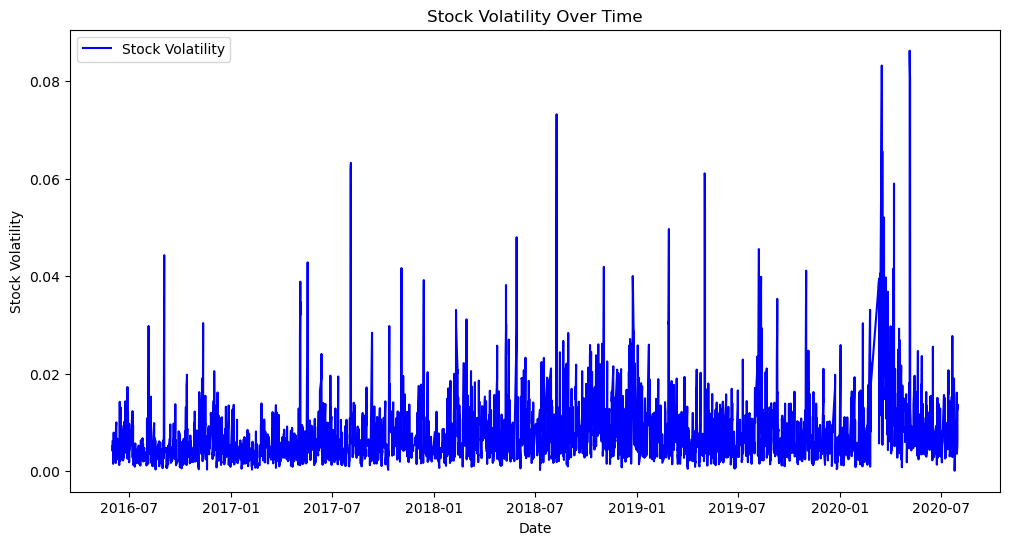

In [20]:
# Visualize the stock volatility

import matplotlib.pyplot as plt

# Plot the Stock Volatility
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['Stock Volatility'], label='Stock Volatility', color='blue')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Volatility')
plt.legend()
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [21]:
# Create a new column in the df_combimed DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

# Create a new column for Hourly Stock Return
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change() * 100

# Drop rows with NaN values
df_combined = df_combined.dropna()







In [22]:
# View the first and last five rows of the df_combined DataFrame
# View the first and last five rows of the updated DataFrame
display(df_combined.head())
display(df_combined.tail())




,Search Trends,Week,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 14:00:00,45.0,2016-05-31/2016-06-06,137.03,40.0,0.004137,0.683321
2016-06-01 15:00:00,48.0,2016-05-31/2016-06-06,136.27,45.0,0.005257,-0.554623
2016-06-02 09:00:00,7.0,2016-05-31/2016-06-06,136.00,48.0,0.005309,-0.198136
2016-06-02 10:00:00,14.0,2016-05-31/2016-06-06,136.83,7.0,0.006091,0.610294
2016-06-02 11:00:00,24.0,2016-05-31/2016-06-06,136.22,14.0,0.005265,-0.445809


,Search Trends,Week,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,20.0,2020-07-28/2020-08-03,1105.780,11.0,0.012837,0.637986
2020-07-31 12:00:00,32.0,2020-07-28/2020-08-03,1087.925,20.0,0.013549,-1.614697
2020-07-31 13:00:00,41.0,2020-07-28/2020-08-03,1095.800,32.0,0.013295,0.723855
2020-07-31 14:00:00,47.0,2020-07-28/2020-08-03,1110.650,41.0,0.013001,1.355174
2020-07-31 15:00:00,53.0,2020-07-28/2020-08-03,1122.510,47.0,0.013566,1.067843


In [23]:
print(df_combined.columns)

Index(['Search Trends', 'Week', 'close', 'Lagged Search Trends',
       'Stock Volatility', 'Hourly Stock Return'],
      dtype='object')


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [24]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return

# Create a DataFrame with the relevant columns
correlation_data = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
display(correlation_matrix)


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.14894,0.061414
Lagged Search Trends,-0.148940,1.00000,0.018120
Hourly Stock Return,0.061414,0.01812,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** If we read down the second column (or read along the second row), we see that there's a slight negative correlation between searches for the firm and its subsequent stock volatility. More searches (slightly) tend to indicate less near-term hourly stock risk for the firm.

On the other hand, there's a positive correlation between search activity in one hour and stock returns in the next: as search activity goes up, so will the firm's stock price in the short term. This effect is very weak though, only half the size of the effect on stock volatility. With the correlation so close to zero, some might also say that there's almost no relationship between these two variables whatsoever, and that the small findings that we do have could be just due to chance. While there's no required threshold when looking at correlation between stock returns and the variables used to predict them, it does tend to be that correlations in this context tend to be very low across the board. It's hard to predict the market!

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [25]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index


# Label the columns ds and y so that the syntax is recognized by Prophet


# Drop an NaN values from the prophet_df DataFrame


# View the first and last five rows of the mercado_prophet_df DataFrame

# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_prophet = df_mercado_trends_reset.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop any NaN values from the prophet_df DataFrame
df_mercado_prophet = df_mercado_prophet.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_mercado_prophet.head())
display(df_mercado_prophet.tail())



,ds,y,Week
0,2016-06-01 00:00:00,97,2016-05-31/2016-06-06
1,2016-06-01 01:00:00,92,2016-05-31/2016-06-06
2,2016-06-01 02:00:00,76,2016-05-31/2016-06-06
3,2016-06-01 03:00:00,60,2016-05-31/2016-06-06
4,2016-06-01 04:00:00,38,2016-05-31/2016-06-06


,ds,y,Week
37101,2020-09-07 20:00:00,71,2020-09-01/2020-09-07
37102,2020-09-07 21:00:00,83,2020-09-01/2020-09-07
37103,2020-09-07 22:00:00,96,2020-09-01/2020-09-07
37104,2020-09-07 23:00:00,97,2020-09-01/2020-09-07
37105,2020-09-08 00:00:00,96,2020-09-08/2020-09-14


In [43]:
conda install -c conda-forge fbprophet


done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: - ^C
unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Call the Prophet function, store as an object
from prophet import Prophet

# Create a Prophet instance
prophet_model = Prophet()

In [49]:
# Fit the time-series model.

prophet_model.fit(df_mercado_prophet)


17:50:04 - cmdstanpy - INFO - Chain [1] start processing
17:50:25 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
# Create a future dataframe to hold predictions

# Make the prediction go out as far as 2000 hours (approx 80 days)


# View the last five rows of the future_mercado_trends DataFrame
# Assuming prophet_model is your already fitted Prophet model
# and df_mercado_prophet is your original DataFrame

# Create a future DataFrame for predictions
future_mercado_trends = prophet_model.make_future_dataframe(periods=2000, freq='H')  # Adjust the number of periods as needed

# View the last five rows of the future_mercado_trends DataFrame
print(future_mercado_trends.tail())



                       ds
39101 2020-11-30 04:00:00
39102 2020-11-30 05:00:00
39103 2020-11-30 06:00:00
39104 2020-11-30 07:00:00
39105 2020-11-30 08:00:00


In [51]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame


# Display the first five rows of the forecast_mercado_trends DataFrame
# Assuming prophet_model is your already fitted Prophet model
# and future_mercado_trends is your future DataFrame

# Make predictions for the trend data
forecast_mercado_trends = prophet_model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
print(forecast_mercado_trends.head())



                   ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 2016-06-01 00:00:00  44.469500   81.366751   97.885234    44.469500   
1 2016-06-01 01:00:00  44.470406   77.904899   95.145728    44.470406   
2 2016-06-01 02:00:00  44.471312   67.398953   84.152096    44.471312   
3 2016-06-01 03:00:00  44.472218   52.103642   69.001949    44.472218   
4 2016-06-01 04:00:00  44.473124   34.760037   52.346965    44.473124   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    44.469500       45.159722             45.159722             45.159722   
1    44.470406       41.605529             41.605529             41.605529   
2    44.471312       31.282049             31.282049             31.282049   
3    44.472218       16.014826             16.014826             16.014826   
4    44.473124       -1.100073             -1.100073             -1.100073   

       daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
0  41.452703  ...  1.86

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

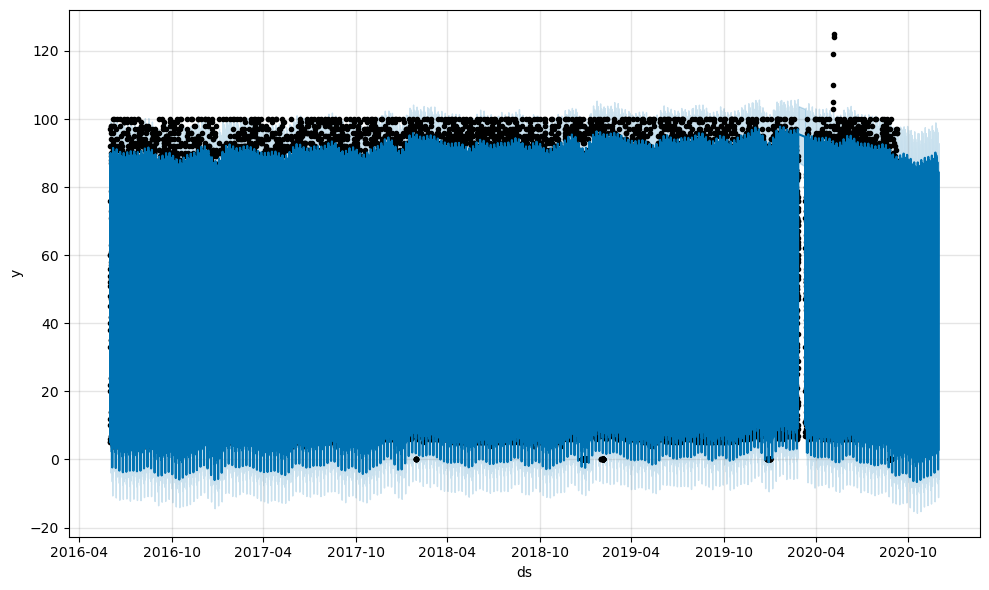

In [52]:
# Plot the Prophet predictions for the Mercado trends data
import matplotlib.pyplot as plt

# Plot the predictions
fig = prophet_model.plot(forecast_mercado_trends)

# Show the plot
plt.show()


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The near-term forecast for the popularity of MercadoLibre, as predicted by the Prophet model, indicates the following trends:

2020-11-30 04:00:00: Predicted popularity is approximately 39.78, with a lower uncertainty interval of 31.07 and an upper uncertainty interval of 47.90.
2020-11-30 05:00:00: Predicted popularity is approximately 24.31, with a lower uncertainty interval of 15.55 and an upper uncertainty interval of 33.23.
2020-11-30 06:00:00: Predicted popularity is approximately 12.34, with a lower uncertainty interval of 3.56 and an upper uncertainty interval of 21.13.
2020-11-30 07:00:00: Predicted popularity is approximately 5.07, with a lower uncertainty interval of -3.56 and an upper uncertainty interval of 13.83.
2020-11-30 08:00:00: Predicted popularity is approximately 2.88, with a lower uncertainty interval of -5.63 and an upper uncertainty interval of 11.59.



In [54]:
# Extract relevant columns for the near-term forecast
near_term_forecast = forecast_mercado_trends[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Display the near-term forecast
print(near_term_forecast.tail())


                       ds       yhat  yhat_lower  yhat_upper
39101 2020-11-30 04:00:00  39.781638   31.068026   47.903634
39102 2020-11-30 05:00:00  24.310504   15.552261   33.228542
39103 2020-11-30 06:00:00  12.344836    3.556033   21.133845
39104 2020-11-30 07:00:00   5.072692   -3.564542   13.828212
39105 2020-11-30 08:00:00   2.877820   -5.630316   11.588883


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [55]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View only the yhat, yhat_lower, and yhat_upper columns from the DataFrame
forecast_columns = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]
forecast_columns.head()




,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.366751,97.885234
2016-06-01 01:00:00,86.075935,77.904899,95.145728
2016-06-01 02:00:00,75.753361,67.398953,84.152096
2016-06-01 03:00:00,60.487045,52.103642,69.001949
2016-06-01 04:00:00,43.373051,34.760037,52.346965


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

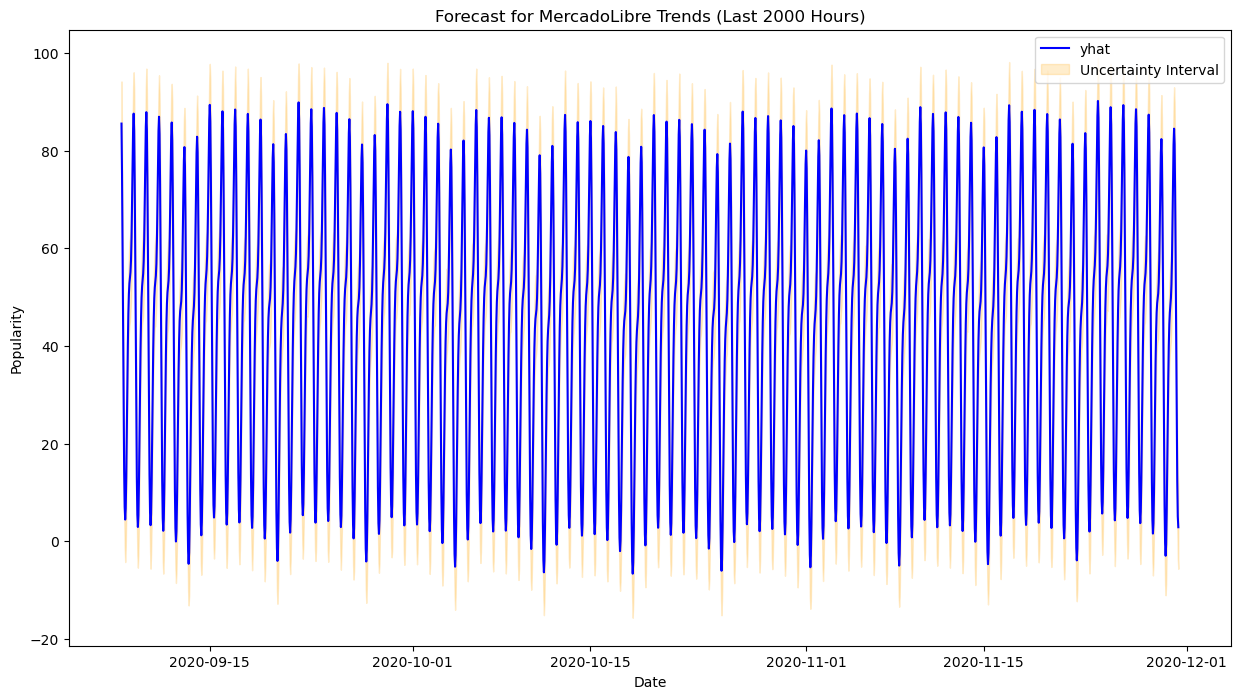

In [57]:
import matplotlib.pyplot as plt

# Plot the data to visualize the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
plt.figure(figsize=(15, 8))
plt.plot(forecast_mercado_trends.index[-2000:], forecast_mercado_trends['yhat'].tail(2000), label='yhat', color='blue')
plt.fill_between(forecast_mercado_trends.index[-2000:], forecast_mercado_trends['yhat_lower'].tail(2000), 
                 forecast_mercado_trends['yhat_upper'].tail(2000), color='orange', alpha=0.2, label='Uncertainty Interval')
plt.title('Forecast for MercadoLibre Trends (Last 2000 Hours)')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.legend()
plt.show()


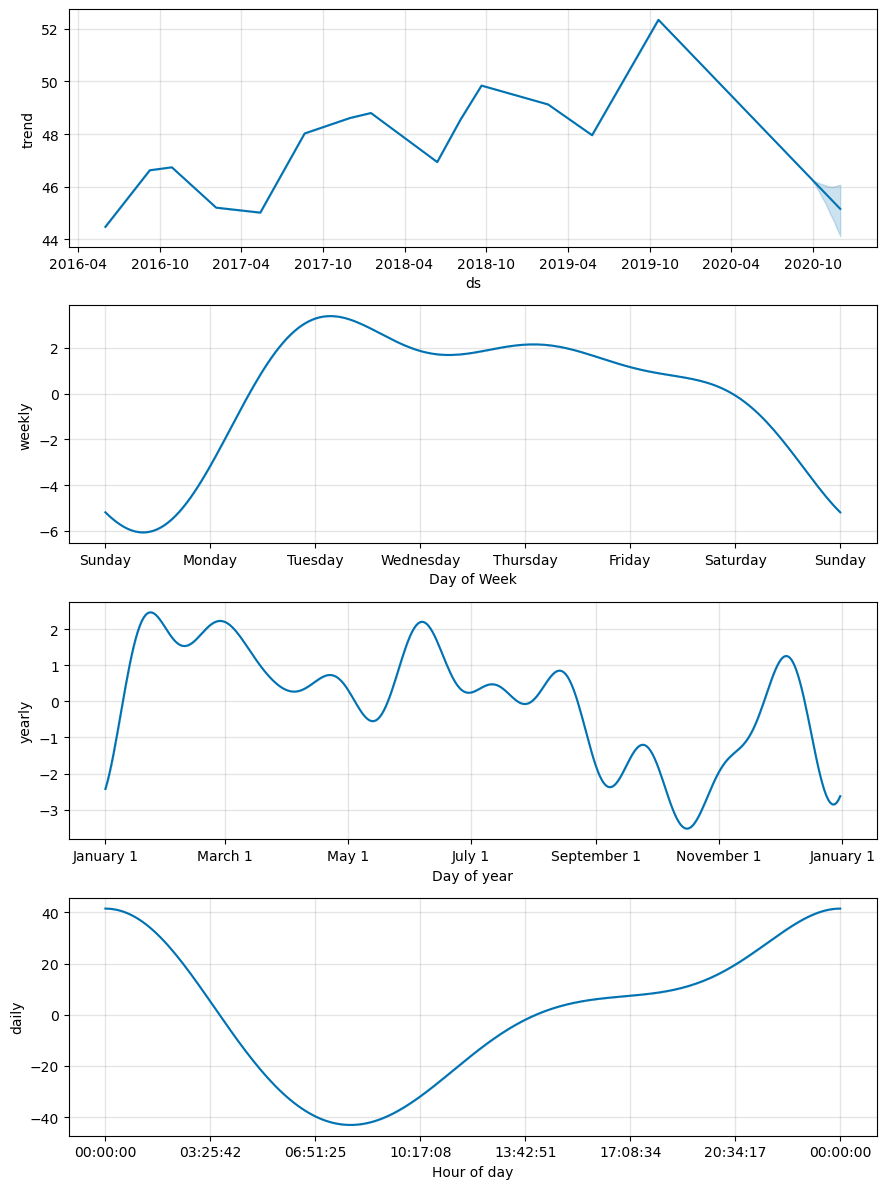

In [58]:
# Reset the index in the forecast_mercado_trends DataFrame


# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends_reset = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results
fig = prophet_model.plot_components(forecast_mercado_trends_reset)
plt.show()



##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** 00:00:00hrs midnight

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** 
